# TO DO

1. Preprocess
3. Postprocess
   - good is +/- 3 points
   - generate answers for test packs (we already know from earlier stats info)
   - from list of skaters to recommended packs

In [1]:
import import_ipynb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold

#import stat_functions

In [2]:
filepath = "C:/Users/trfit/OneDrive/Documents/Hobbies/CRG/stats 2025/prepped_data/" 
file = "VL_Akron_data.csv"
df = pd.read_csv(filepath+file)


In [3]:
filepath = "C:/Users/trfit/OneDrive/Documents/Hobbies/CRG/stats 2025/prepped_data/" 
VL_files = [
    "VL_Akron_data.csv",
    "VL_Athens_data.csv",
    "VL_Terrorz_data.csv"]
BS_files = [
    "BS_Akron_data.csv",
    "BS_Athens_data.csv",
    "BS_Great_Lakes_data.csv",
    "BS_Louisville_data.csv"]
df_lst = []
for file in VL_files:
    df_lst.append(pd.read_csv(filepath+file))
df = pd.concat(df_lst, ignore_index=True)

In [4]:
for col in df.columns:
    print(col)

OP
Half
Jam
noPivot
Jammer
Jammer_Box_1
Jammer_Box_2
Jammer_Box_3
Pivot
Pivot_Box_1
Pivot_Box_2
Pivot_Box_3
Blocker_1
Blocker_1_Box_1
Blocker_1_Box_2
Blocker_1_Box_3
Blocker_2
Blocker_2_Box_1
Blocker_2_Box_2
Blocker_2_Box_3
Blocker_3
Blocker_3_Box_1
Blocker_3_Box_2
Blocker_3_Box_3
OP_noPivot
OP_Jammer
OP_Jammer_Box_1
OP_Jammer_Box_2
OP_Jammer_Box_3
OP_Pivot
OP_Pivot_Box_1
OP_Pivot_Box_2
OP_Pivot_Box_3
OP_Blocker_1
OP_Blocker_1_Box_1
OP_Blocker_1_Box_2
OP_Blocker_1_Box_3
OP_Blocker_2
OP_Blocker_2_Box_1
OP_Blocker_2_Box_2
OP_Blocker_2_Box_3
OP_Blocker_3
OP_Blocker_3_Box_1
OP_Blocker_3_Box_2
OP_Blocker_3_Box_3
LOST
LEAD
CALL
INJ.
NI
Trip 2
 Trip 3
Trip 4
Trip 5
Trip 6
Trip 7
Trip 8
Trip 9
Trip 10
Jam Total
Game Total
Trips
OP_LOST
OP_LEAD
OP_CALL
OP_INJ.
OP_NI
OP_Jam Total
OP_Game Total
OP_Trips
SP
SP_noPivot
SP_Jammer
SP_Jammer_Box_1
SP_Jammer_Box_2
SP_Jammer_Box_3
SP_Pivot
SP_Pivot_Box_1
SP_Pivot_Box_2
SP_Pivot_Box_3
SP_OP_noPivot
SP_OP_Jammer
SP_OP_Jammer_Box_1
SP_OP_Jammer_Box_2
SP_OP

In [5]:
df['OP'].unique()

array(['Akron', 'Athens', 'Terrorz'], dtype=object)

In [6]:
df_encoded = pd.get_dummies(df[['Blocker_1','Blocker_2']], columns=['Blocker_1','Blocker_2'])

In [7]:
df_encoded

,Blocker_1_13,Blocker_1_16,Blocker_1_27,Blocker_1_35,Blocker_1_36,Blocker_1_48,Blocker_1_71,Blocker_1_83,Blocker_1_88,Blocker_1_137,...,Blocker_2_100,Blocker_2_137,Blocker_2_222,Blocker_2_423,Blocker_2_555,Blocker_2_603,Blocker_2_711,Blocker_2_721,Blocker_2_800,Blocker_2_933
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
128,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [8]:
df_encoded.sum(axis=1)

0      2
1      2
2      2
3      2
4      2
      ..
127    2
128    2
129    2
130    2
131    2
Length: 132, dtype: int64

# Feature preparation

Jam Embeddings: | Jam_id | point_diff | lead | Trips | jammer_penalty_counter | blocker_penalty_counter | skater1_as_jammer |...| skatern_as_jammer | skater1_as_blocker |...| skatern_as_blocker |

curr_col = ['OP','Half','Jam',
            'LEAD', #'OP_LEAD',
            'Jammer', 'Pivot', 'Blocker_1', 'Blocker_2', 'Blocker_3',
            'Trips','OP_Trips', 
            'Jam Total', 'Game Total','OP_Jam Total', 'OP_Game Total',
            'Jammer_Box_1', 'Jammer_Box_2','Jammer_Box_3',
            'Pivot_Box_1','Pivot_Box_2','Pivot_Box_3',
            'Blocker_1_Box_1','Blocker_1_Box_2','Blocker_1_Box_3',
            'Blocker_2_Box_1','Blocker_2_Box_2','Blocker_2_Box_3',
            'Blocker_3_Box_1','Blocker_3_Box_2','Blocker_3_Box_3']

Ready: 
 - game_id: OP
 - points_for: Jam Total, Game Total
 - lead_for_us (0/1): boolean
 - our_jammer (string)
 - jam_duration: Trips
 - points_against: OP_Jam Total, OP_Game Total

Need work:
- jam_id: need to separate by game & by half
- our_blockers (list/JSON/string of 4 skater IDs): separate columns, int type

Dont have
 - penalties_our_team (int)
 - penalties_their_team (int)


box characters: 
- –  = Entered the box mid-jam.
- S = Entered between jams or continued from previous jam.
- | = Finished service.
- '+' combines - & |
- 'dollar sign' Combines + and S. Almost always paired with a - in the previous jam
- 3 = Skater injured or needed sub, sits out 3 jams.

# Preprocess

In [9]:
# Functions

def build_encoded_matrix(df, cols, skaters):
    # This function calculates the average normalized jam +/- for each skater using matrix multiplication. This method is used because it makes 
    # it easier to remove a skater and recalculate.

    df_encoded = pd.get_dummies(df, columns=cols)

    # Combine the position boolean columns, so each skater has one boolean column, True = skater was in the jam, False = skater was not in the jam
    #cols = ['Jammer', 'Pivot', 'Blocker 1', 'Blocker 2', 'Blocker 3']
    for skater in skaters:
        cols_comb = []
        for col in cols:
            if col+"_"+str(skater) in df_encoded.columns:
                cols_comb.append(col+"_"+str(skater))
        df_encoded[str(skater)] = df_encoded[cols_comb].any(axis='columns')
    
        for col in cols_comb:
            df_encoded = df_encoded.drop(col, axis=1)

    return df_encoded
    

In [10]:
# Create feature df
# Jam Embeddings: | x jam_id | x point_diff | x lead | x trips | x jammer_penalty_counter | x blocker_penalty_counter | skater1_as_jammer |...| skatern_as_jammer | skater1_as_blocker |...| skatern_as_blocker |
X_feature_col = []
X_skater_col = []
df_features = pd.DataFrame()

# Make Jam_id
for col in ['OP', 'Half',  'Jam']:
    df[col] = df[col].astype("string")
df_features['jam_id'] = df['OP'] +"_"+ df['Half'] +"_"+ df['Jam']

df_features['OP'] = df['OP']
# Make other features
df_features['point_diff'] = df['Jam Total'] - df['OP_Jam Total']
df_features['lead'] = df['LEAD'].replace({np.nan: False, "X": True}).infer_objects(copy=False)
df_features['trips'] = df['Trips']

X_feature_col += ['lead', 'trips']

# Make jammer_penalty_counter
for col in ['Jammer_Box_1', 'Jammer_Box_2', 'Jammer_Box_3']:
    df[col] = df[col].replace({np.nan: 0, '+': 1, '-': 1, '$': 1}).infer_objects(copy=False)
df_features['jammer_penalty_counter'] = df['Jammer_Box_1'] + df['Jammer_Box_2'] + df['Jammer_Box_3']

df_features['blocker_penalty_counter'] = 0
for col in ['Pivot_Box_1','Pivot_Box_2','Pivot_Box_3',
            'Blocker_1_Box_1','Blocker_1_Box_2','Blocker_1_Box_3',
            'Blocker_2_Box_1','Blocker_2_Box_2','Blocker_2_Box_3',
            'Blocker_3_Box_1','Blocker_3_Box_2','Blocker_3_Box_3']:

    df[col] = df[col].replace({np.nan: 0, '+': 1, '-': 1, '$': 1, 'S': 1, '3':0}).infer_objects(copy=False)
    df_features['blocker_penalty_counter'] += df[col]

X_feature_col += ['jammer_penalty_counter', 'blocker_penalty_counter']    

# jammer & blocker one hot encoding
blocker_cols = ['Pivot','Blocker_1', 'Blocker_2', 'Blocker_3']
df_encoded = build_encoded_matrix(
    df[blocker_cols], blocker_cols, 
    pd.concat([df['Pivot'],df['Blocker_1'],df['Blocker_2'],df['Blocker_3']]).unique()
)
X_skater_col += [col for col in df_encoded.columns]
df_features = pd.concat([df_features, df_encoded], axis=1)

df_encoded = build_encoded_matrix(
    df['Jammer'], ['Jammer'], 
    df['Jammer'].unique()
)

for jammer in df['Jammer'].unique():
    df_features[str(jammer)+"_jammer"] = False
    df_features[str(jammer)+"_jammer"] = df_features[str(jammer)+"_jammer"] | df_encoded[jammer]
    X_skater_col.append(str(jammer)+"_jammer")

X_col = X_feature_col + X_skater_col


C:\Users\trfit\AppData\Local\Temp\ipykernel_22344\124046433.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features['lead'] = df['LEAD'].replace({np.nan: False, "X": True}).infer_objects(copy=False)
C:\Users\trfit\AppData\Local\Temp\ipykernel_22344\124046433.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({np.nan: 0, '+': 1, '-': 1, '$': 1}).infer_objects(copy=False)
C:\Users\trfit\AppData\Local\Temp\ipykernel_22344\124046433.py:31: FutureWarning: Downcasting behavior in `replace` is depreca

In [6]:
opponents = df['OP'].unique()

df_features['norm_point_diff'] = 0.0
# df['point_diff'] = df['Jam +/-'].astype(float)

for game in opponents:
    mean = df_features[df_features['OP'] == game]['point_diff'].mean()
    stddev = df_features[df_features['OP'] == game]['point_diff'].std()
    df_features.loc[df_features['OP'] == game, 'norm_point_diff'] = ((df_features.loc[df_features['OP'] == game, 'point_diff'] - mean) / stddev)

# Train/Test

In [11]:
alpha = 20.0 # you can tune this
ridge_model = Ridge(alpha=alpha)

## 80/20 Split Test

In [12]:
train_set = df_features.sample(frac=0.8, random_state=42)
X = train_set[X_col]
#y = train_set['norm_point_diff']
y = train_set['point_diff']

# Dropping all those indexes from the dataframe that exists in the train_set
test_set = df_features.drop(train_set.index).reset_index()
#train_set.shape
#test_set.shape

In [13]:
# Cross-validation to gauge performance 
cv = KFold(n_splits=5, shuffle=True, random_state=42) 

neg_mse_scores = cross_val_score( ridge_model, X, y, cv=cv, scoring="neg_mean_squared_error" ) 

rmse_scores = np.sqrt(-neg_mse_scores) 

r2_scores = cross_val_score(ridge_model, X, y, cv=cv, scoring="r2") 
print("CV RMSE:", rmse_scores.mean(), "+/-", rmse_scores.std()) 
print("CV R^2:", r2_scores.mean(), "+/-", r2_scores.std()) 

#Fit the final model on all data:
ridge_model.fit(X, y) 


CV RMSE: 4.19644893146648 +/- 0.65134058139965
CV R^2: 0.6154844884282933 +/- 0.06647893525221824


Ridge(alpha=20.0)

In [14]:
ridge_model.coef_ # ndarray of shape (n_features,) or (n_targets, n_features)Weight vector(s).

ridge_model.intercept_ # float or ndarray of shape (n_targets,)Independent term in decision function. Set to 0.0 if fit_intercept = False.

ridge_model.n_iter_ # _None or ndarray of shape (n_targets,) Actual number of iterations for each target. Available only for sag and lsqr solvers. Other solvers will return None.

ridge_model.n_features_in_ # int Number of features seen during fit.

ridge_model.feature_names_in_ # ndarray of shape (n_features_in_,)

array(['lead', 'trips', 'jammer_penalty_counter',
       'blocker_penalty_counter', '721', '100', '6', '555', '13', '711',
       '222', '27', '517', '16', '35', '88', '800', '603', '83', '36',
       '33', '48', '71', '423', '933', '137', '517_jammer', '27_jammer',
       '721_jammer', '711_jammer', '555_jammer', '100_jammer', '6_jammer',
       '88_jammer', '16_jammer', '603_jammer', '33_jammer'], dtype=object)

In [15]:
y_test = ridge_model.predict(test_set[X_col])

In [16]:
test_set

,index,jam_id,OP,point_diff,lead,trips,jammer_penalty_counter,blocker_penalty_counter,721,100,...,27_jammer,721_jammer,711_jammer,555_jammer,100_jammer,6_jammer,88_jammer,16_jammer,603_jammer,33_jammer
0,1,Akron_B_1,Akron,-4,False,1,0.0,1.0,True,True,...,True,False,False,False,False,False,False,False,False,False
1,2,Akron_A_2,Akron,-4,False,1,0.0,0.0,True,False,...,True,False,False,False,False,False,False,False,False,False
2,14,Akron_A_8,Akron,-4,False,1,1.0,1.0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,20,Akron_A_11,Akron,-10,False,0,0.0,1.0,True,False,...,False,False,False,True,False,False,False,False,False,False
4,21,Akron_B_11,Akron,4,True,3,0.0,0.0,True,False,...,True,False,False,False,False,False,False,False,False,False
5,23,Akron_B_12,Akron,2,True,1,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False
6,29,Akron_B_15,Akron,0,False,2,0.0,1.0,False,False,...,True,False,False,False,False,False,False,False,False,False
7,37,Akron_B_19,Akron,0,True,3,0.0,0.0,True,True,...,True,False,False,False,False,False,False,False,False,False
8,52,Athens_A_9,Athens,-3,False,1,0.0,0.0,True,False,...,True,False,False,False,False,False,False,False,False,False
9,60,Athens_A_17,Athens,0,False,0,0.0,0.0,False,False,...,False,False,False,False,False,False,False,False,False,False


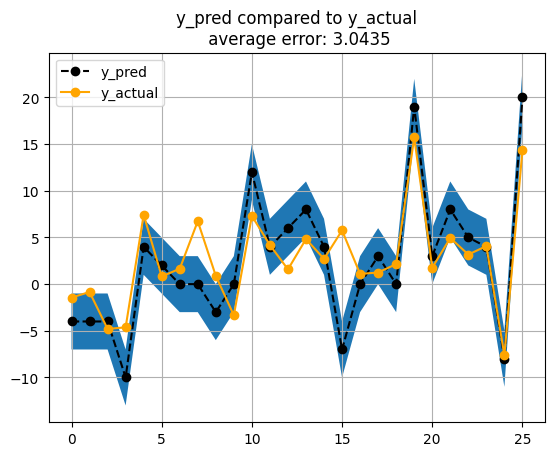

In [17]:
plt.fill_between(range(0,len(y_test)), test_set['point_diff']-3, test_set['point_diff']+3)
plt.plot(test_set['point_diff'],'--o', label='y_pred', color='black')
plt.plot(y_test,'-o',label='y_actual',color='orange')

plt.title ("y_pred compared to y_actual\n average error: "+ str(round(np.mean(abs(test_set['point_diff'] - y_test)),4)))
plt.legend()
plt.grid()


In [23]:
comp_results = (abs(test_set['point_diff'] - y_test) < 3).value_counts()[True]
print(comp_results)

13


In [11]:
coef_series = pd.Series( ridge_model.coef_, index=X_col ).sort_values(ascending=False) #coef_series.head(20), coef_series.tail(20)
coef_series #

trips                      2.829784
lead                       2.291134
27_jammer                  0.991166
88                         0.791936
33                         0.633137
71                         0.500029
933                        0.409031
603                        0.390771
36                         0.344039
100_jammer                 0.313906
711                        0.249547
423                        0.174729
16_jammer                  0.162980
48                         0.147556
603_jammer                 0.126077
16                         0.124145
33_jammer                  0.107978
83                         0.086542
555_jammer                 0.055629
6_jammer                   0.038914
800                       -0.133060
13                        -0.192342
137                       -0.211925
88_jammer                 -0.280083
721_jammer                -0.291597
27                        -0.295412
517                       -0.305007
517_jammer                -0

In [12]:
jammer_effects = coef_series[[c for c in coef_series.index if c.endswith("_jammer")]] 

In [13]:
jammer_effects

27_jammer     0.991166
100_jammer    0.313906
16_jammer     0.162980
603_jammer    0.126077
33_jammer     0.107978
555_jammer    0.055629
6_jammer      0.038914
88_jammer    -0.280083
721_jammer   -0.291597
517_jammer   -0.358060
711_jammer   -0.866909
dtype: float64

In [48]:
df_test = pd.DataFrame([[0]*len(X_col)], columns=X_col)
for col in ['517_jammer', '721', '603', '36', '100']:
    df_test[col] = True
ridge_model.predict(df_test)[0] 

np.float64(-4.6801483238309896)

In [18]:
df_test = pd.DataFrame([[0]*len(X_col)], columns=X_col)
for col in X_feature_col:
    df_test[col] = X[col].mean()
for col in ['517_jammer', '711', '222', '83', '13']:
    df_test[col] = True
ridge_model.predict(df_test)[0] 

np.float64(-0.2603395034214051)

In [19]:
df_test

,lead,trips,jammer_penalty_counter,blocker_penalty_counter,721,100,6,555,13,711,...,27_jammer,721_jammer,711_jammer,555_jammer,100_jammer,6_jammer,88_jammer,16_jammer,603_jammer,33_jammer
0,0.537736,1.537736,0.179245,0.783019,0,0,0,0,True,True,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_features.head(10)

,jam_id,point_diff,lead,trips,jammer_penalty_counter,blocker_penalty_counter,721,6,13,711,...,36,83,48,517_jammer,27_jammer,721_jammer,100_jammer,555_jammer,6_jammer,711_jammer
0,Akron_A_1,-4,False,0,0.0,0.0,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False
1,Akron_A_2,-4,False,1,0.0,0.0,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,Akron_A_3,-7,False,0,0.0,0.0,False,True,False,False,...,True,False,True,False,False,True,False,False,False,False
3,Akron_A_4,-3,False,2,0.0,0.0,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
4,Akron_A_5,4,False,2,1.0,1.0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
5,Akron_A_6,3,True,1,0.0,1.0,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
6,Akron_A_7,-8,False,0,1.0,1.0,False,False,True,True,...,False,True,False,True,False,False,False,False,False,False
7,Akron_A_8,-4,False,1,1.0,1.0,False,True,False,True,...,True,False,True,True,False,False,False,False,False,False
8,Akron_A_9,0,False,0,0.0,0.0,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
9,Akron_A_10,3,True,1,0.0,1.0,False,True,False,False,...,True,False,True,False,True,False,False,False,False,False


## External test set

In [16]:
test_packs = [['88', '66', '40', '6'],['66', '40', '36', '6'],['66', '10', '6', '40'],['66', '40', '519', '6'],['116', '66', '40', '6'],
            ['66', '154', '6', '40'],['22', '66', '40', '6'],['66', '36', '519', '6'],['116', '66', '154', '6'],
            ['22', '66', '154', '6'],['66', '27', '36', '40'],['66', '40', '36', '603'],['36', '66', '40', '519'],
            ['66', '40', '36', '711'],['66', '27', '519', '40'],['66', '40', '711', '603'],['116', '66', '154', '40'],
            ['22', '66', '154', '40'],['36', '66', '27', '519'],['66', '36', '711', '603'],['116', '40', '137', '100'],
            ['116', '36', '137', '100'],['116', '22', '36', '100'],['40', '36', '137', '6'],['40', '36', '519', '6'],
            ['116', '40', '36', '6'],['116', '40', '137', '6'],['40', '222', '137', '6'],['116', '40', '154', '6'],
            ['116', '40', '222', '6'],['22', '154', '6', '40'],['116', '36', '137', '6'],['116', '222', '137', '6'],
            ['16', '711', '603', '6'],['88', '40', '10', '603'],['88', '40', '10', '33'],['88', '40', '10', '154'],
            ['88', '40', '10', '721'],['88', '40', '721', '603'],['88', '40', '154', '33'],['40', '10', '603', '43'],
            ['116', '40', '36', '137'],['36', '40', '27', '519'],['40', '36', '711', '603'],['116', '40', '222', '137'],
            ['40', '10', '721', '603'],['40', '10', '33', '154'],['88', '10', '603', '43'],['88', '10', '154', '43'],
            ['88', '22', '10', '43'],['88', '22', '603', '43'],['88', '22', '10', '603'],['88', '10', '721', '603'],
            ['88', '10', '154', '33'],['88', '10', '721', '800'],['22', '10', '603', '43']]
y_act = [np.float64(6.2), np.float64(0.6666666666666666), np.float64(1.0), np.float64(6.333333333333333), np.float64(-0.6666666666666666), np.float64(-1.3333333333333333), np.float64(-1.3333333333333333), np.float64(0.25), np.float64(-1.3333333333333333), np.float64(-4.0), np.float64(2.6666666666666665), np.float64(7.333333333333333), np.float64(4.5), np.float64(7.333333333333333), np.float64(6.5), np.float64(-1.6666666666666667), np.float64(0.3333333333333333), np.float64(2.6666666666666665), np.float64(6.428571428571429), np.float64(1.3333333333333333), np.float64(-0.25), np.float64(3.3333333333333335), np.float64(1.75), np.float64(-0.75), np.float64(4.25), np.float64(-1.0), np.float64(0.3333333333333333), np.float64(2.5), np.float64(6.4), np.float64(6.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(-1.0), np.float64(-1.25), np.float64(5.0), np.float64(-0.14285714285714285), np.float64(0.0), np.float64(-8.0), np.float64(-3.142857142857143), np.float64(-2.6666666666666665), np.float64(-1.2857142857142858), np.float64(1.0), np.float64(-3.75), np.float64(-2.6666666666666665), np.float64(-2.0), np.float64(-2.0), np.float64(-4.666666666666667), np.float64(-2.3333333333333335), np.float64(4.0), np.float64(1.3333333333333333), np.float64(5.625), np.float64(5.125), np.float64(4.714285714285714), np.float64(-4.8), np.float64(4.25), np.float64(8.0), np.float64(6.125), np.float64(6.333333333333333), np.float64(-2.6666666666666665), np.float64(-1.75), np.float64(-4.75), np.float64(1.5), np.float64(1.8), np.float64(0.6), np.float64(-4.8), np.float64(2.3333333333333335), np.float64(2.0), np.float64(5.5), np.float64(2.0), np.float64(8.0), np.float64(4.0), np.float64(4.0), np.float64(4.3), np.float64(4.0), np.float64(0.0), np.float64(4.714285714285714), np.float64(9.5), np.float64(4.0)]
#y_act = [np.float64(-1.8945665885063272), np.float64(0.2515464275707353), np.float64(-1.32400305303972), np.float64(0.2515464275707353), np.float64(0.004064181921214716), np.float64(-0.5060929421056626), np.float64(-0.8105394775911003), np.float64(0.2202807699065761), np.float64(-0.40724666435065043), np.float64(-0.5851699643096725), np.float64(0.03268682392162096), np.float64(-0.18331326981754126), np.float64(0.13899005997976221), np.float64(-0.2979909929973877), np.float64(-0.123641464399175), np.float64(-0.28705554371307984), np.float64(-0.3479388976976431), np.float64(-0.8105394775911003), np.float64(-0.043244058977051365), np.float64(-0.39422294669929636), np.float64(0.007907702220400936), np.float64(-0.11070783108561373), np.float64(0.45271595211795607), np.float64(-0.44015183369338917), np.float64(0.2515464275707353), np.float64(-0.7059530216265105), np.float64(0.24878147121800256), np.float64(1.0142629211195489), np.float64(-0.6444777309626798), np.float64(1.0142629211195489), np.float64(-0.8105394775911003), np.float64(-0.33298443070717265), np.float64(0.24878147121800254), np.float64(-0.6864233023540405), np.float64(1.7110515616014064), np.float64(-0.13395925373277062), np.float64(-0.13395925373277062), np.float64(1.3771101034804663), np.float64(1.9398919414353317), np.float64(-0.13395925373277062), np.float64(0.6306392520769781), np.float64(0.03647782354149293), np.float64(0.03268682392162096), np.float64(-0.28705554371307984), np.float64(1.0142629211195489), np.float64(1.9398919414353317), np.float64(-0.13395925373277062), np.float64(0.48236983544445977), np.float64(-0.1700155977386211), np.float64(-0.0514000644326064), np.float64(0.42306206879145236), np.float64(0.42306206879145236), np.float64(0.8143282655256009), np.float64(0.4018777611983118), np.float64(-0.46756369870492615), np.float64(0.42306206879145236)]

In [17]:
df_features.describe()

,point_diff,trips,jammer_penalty_counter,blocker_penalty_counter,norm_point_diff
count,132.000000,132.000000,132.000000,132.000000,1.320000e+02
mean,1.068182,1.636364,0.181818,0.765152,6.728624e-18
std,6.931721,1.315049,0.459309,0.808918,9.923371e-01
min,-20.000000,0.000000,0.000000,0.000000,-3.153940e+00
25%,-4.000000,1.000000,0.000000,0.000000,-4.636045e-01
50%,0.000000,1.000000,0.000000,1.000000,-7.054851e-02
75%,4.000000,2.000000,0.000000,1.000000,4.836317e-01
max,20.000000,6.000000,2.000000,4.000000,2.189805e+00


In [19]:
df_test = pd.DataFrame([[0]*len(X_col)]*len(test_packs), columns=X_col)
# Create dataframe
i = -1
for pack in test_packs:
    i += 1
    df_test.loc[[i],['point_diff']] = y_act[i] 
    for skater in pack:
        df_test.loc[[i],[skater]] = 1

for col in X_feature_col:
    df_test[col] = X[col].mean()

y_pred = ridge_model.predict(df_test[X_col])
        

In [20]:
df_test

,lead,trips,jammer_penalty_counter,blocker_penalty_counter,721,100,6,555,13,711,...,33_jammer,point_diff,66,40,10,519,116,154,22,43
0,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,6.200000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,0.666667,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,1.000000,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,6.333333,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,-0.666667,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
5,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,-1.333333,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
6,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,-1.333333,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
7,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,0.250000,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,-1.333333,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
9,0.537736,1.537736,0.179245,0.783019,0,0,1,0,0,0,...,0,-4.000000,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [22]:
TP = 0
FP = 0
i = 0
print("| pack                          | actual | prediction | diff |")
print("|-------------------------------+--------+------------+------|")
for pred in y_pred:
    if abs(y_act[i] - pred) > 3:
        FP += 1
    else:
        TP += 1
    a = str(test_packs[i])
    a_spc = " "*(30 - len(a))
    b = str(round(y_act[i],2))
    b_spc = " "*(6 - len(b))
    c = str(round(pred,2))
    c_spc =  " "*(11 - len(c))
    d = str(round(y_act[i] - pred,2))
    d_spc =  " "*(5 - len(d))
    
    print("| " + a + a_spc + "|  " + b + b_spc + "| "+ c + c_spc + "| " + d + d_spc + "|")
    print("|-------------------------------+--------+------------+------|")
    i+=1

| pack                          | actual | prediction | diff |
|-------------------------------+--------+------------+------|
| ['88', '66', '40', '6']       |  6.2   | 0.72       | 5.48 |
|-------------------------------+--------+------------+------|
| ['66', '40', '36', '6']       |  0.67  | 0.28       | 0.39 |
|-------------------------------+--------+------------+------|
| ['66', '10', '6', '40']       |  1.0   | -0.07      | 1.07 |
|-------------------------------+--------+------------+------|
| ['66', '40', '519', '6']      |  6.33  | -0.07      | 6.4  |
|-------------------------------+--------+------------+------|
| ['116', '66', '40', '6']      |  -0.67 | -0.07      | -0.6 |
|-------------------------------+--------+------------+------|
| ['66', '154', '6', '40']      |  -1.33 | -0.07      | -1.26|
|-------------------------------+--------+------------+------|
| ['22', '66', '40', '6']       |  -1.33 | -0.07      | -1.26|
|-------------------------------+--------+------------+

In [ ]:
print(TP, FP)

In [25]:
i = 0
print("| pack                          | actual | prediction | diff |")
print("|-------------------------------+--------+------------+------|")
for pred in y_pred: 
    a = str(test_packs[i])
    a_spc = " "*(30 - len(a))
    b = str(round(y_act[i],2))
    b_spc = " "*(6 - len(b))
    c = str(round(pred,2))
    c_spc =  " "*(11 - len(c))
    d = str(round(y_act[i] - pred,2))
    d_spc =  " "*(5 - len(d))
    
    print("| " + a + a_spc + "|  " + b + b_spc + "| "+ c + c_spc + "| " + d + d_spc + "|")
    print("|-------------------------------+--------+------------+------|")
    i+=1

| pack                          | actual | prediction | diff |
|-------------------------------+--------+------------+------|
| ['88', '66', '40', '6']       |  -1.89 | 0.72       | -2.62|
|-------------------------------+--------+------------+------|
| ['66', '40', '36', '6']       |  0.25  | 0.28       | -0.02|
|-------------------------------+--------+------------+------|
| ['66', '10', '6', '40']       |  -1.32 | -0.07      | -1.26|
|-------------------------------+--------+------------+------|
| ['66', '40', '519', '6']      |  0.25  | -0.07      | 0.32 |
|-------------------------------+--------+------------+------|
| ['116', '66', '40', '6']      |  0.0   | -0.07      | 0.07 |
|-------------------------------+--------+------------+------|
| ['66', '154', '6', '40']      |  -0.51 | -0.07      | -0.44|
|-------------------------------+--------+------------+------|
| ['22', '66', '40', '6']       |  -0.81 | -0.07      | -0.74|
|-------------------------------+--------+------------+

# Individual Skater test

In [97]:
df_test = pd.DataFrame([[0]*len(X_col)], columns=X_col)
df_test['36'] = 1

y_pred = ridge_model.predict(df_test[X_col])
print(y_pred)

[-0.53990487]


In [103]:
skaters = ['517', '711', '721', '100', '6', '13', '222', '27', '16', '88', '35', '83', '800', '423', '603', '71', '36', '33', '555', '48', '137', '933']
df_test = pd.DataFrame([[0]*len(X_col)]*len(skaters), columns=X_col)
# Create dataframe
i = -1
for skater in skaters:
    i += 1
    df_test.loc[[i],['point_diff']] = y_act[i] 
    #for skater in pack:
    df_test.loc[[i],[skater]] = 1

y_pred = ridge_model.predict(df_test[X_col])

In [110]:
i = 0
print("| skater | actual | prediction | diff |")
print("|--------+--------+------------+------|")
for pred in y_pred: 
    a = str(skaters[i])
    a_spc = " "*(7 - len(a))
    b = str(round(y_act[i],2))
    b_spc = " "*(6 - len(b))
    c = str(round(pred,2))
    c_spc =  " "*(11 - len(c))
    d = str(round(y_act[i] - pred,2))
    d_spc =  " "*(5 - len(d))
    
    print("| " + a + a_spc + "|  " + b + b_spc + "| "+ c + c_spc + "| " + d + d_spc + "|")
    print("|--------+--------+------------+------|")
    i+=1

| skater | actual | prediction | diff |
|--------+--------+------------+------|
| 517    |  -1.89 | -0.65      | -1.24|
|--------+--------+------------+------|
| 711    |  0.25  | -0.59      | 0.84 |
|--------+--------+------------+------|
| 721    |  -1.32 | -0.66      | -0.66|
|--------+--------+------------+------|
| 100    |  0.25  | -0.58      | 0.84 |
|--------+--------+------------+------|
| 6      |  0.0   | -0.64      | 0.64 |
|--------+--------+------------+------|
| 13     |  -0.51 | -0.53      | 0.02 |
|--------+--------+------------+------|
| 222    |  -0.81 | -0.53      | -0.28|
|--------+--------+------------+------|
| 27     |  0.22  | -0.62      | 0.84 |
|--------+--------+------------+------|
| 16     |  -0.41 | -0.68      | 0.27 |
|--------+--------+------------+------|
| 88     |  -0.59 | -0.61      | 0.03 |
|--------+--------+------------+------|
| 35     |  0.03  | -0.74      | 0.77 |
|--------+--------+------------+------|
| 83     |  -0.18 | -0.62      | 0.44 |


# Postprocess

# Cross Validation

- alpha
- 

In [92]:
coef_series = pd.Series( ridge_model.coef_, index=X_col ).sort_values(ascending=False) #coef_series.head(20), coef_series.tail(20)
coef_series #

trips                      0.391771
lead                       0.283911
27_jammer                  0.120431
603                        0.119606
48                         0.096340
13                         0.089088
222                        0.088800
100_jammer                 0.086053
36                         0.076267
555_jammer                 0.055660
100                        0.032154
71                         0.026848
711                        0.024016
6_jammer                   0.015480
603_jammer                 0.012074
33                         0.007380
33_jammer                  0.007328
88                         0.002962
83                        -0.003102
721_jammer                -0.005241
27                        -0.007953
6                         -0.022119
555                       -0.031936
517                       -0.034946
933                       -0.039408
16_jammer                 -0.040299
88_jammer                 -0.042319
721                       -0